In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as sm
import statsmodels.api as ap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("T3_Process.csv")
df['SE Process grade '].replace(to_replace=["A","F"], value=["1","2"],inplace=True)

In [3]:
data = df.iloc[:, 0:-1]

In [4]:
data

,teamMemberCount,femaleTeamMembersPercent,teamLeadGender,teamDistribution,teamMemberResponseCount,meetingHoursTotal,meetingHoursAverage,meetingHoursStandardDeviation,inPersonMeetingHoursTotal,inPersonMeetingHoursAverage,...,averageUniqueCommitMessagePercentByWeek,standardDeviationUniqueCommitMessagePercentByWeek,averageCommitMessageLengthTotalByWeek,standardDeviationCommitMessageLengthTotalByWeek,averageCommitCountByStudent,standardDeviationCommitCountByStudent,averageUniqueCommitMessageCountByStudent,issueCount,onTimeIssueCount,lateIssueCount
0,6,0.1667,0,0,5,12.000000,2.400000,1.019804,6.500000,1.300000,...,0.834467,0.071717,3676.3333,752.953887,20.6667,17.950549,17.3333,1,1,0
1,3,0.0000,0,1,2,7.150000,3.575000,1.175000,2.000000,1.000000,...,0.608667,0.181630,2805.3333,2556.984465,24.5714,21.319724,13.7143,4,3,1
2,3,0.0000,0,1,3,30.000000,10.000000,3.559026,16.000000,5.333333,...,0.869567,0.106512,1049.6667,572.425444,12.6667,13.237153,10.6667,2,2,0
3,3,0.0000,0,1,4,15.500000,3.875000,1.340476,11.500000,2.875000,...,0.435400,0.154557,1988.3333,1159.291259,31.3333,20.669355,14.5000,4,2,2
4,7,0.1429,0,0,20,56.357143,2.817857,2.226404,47.785714,2.389286,...,0.745850,0.129186,2845.2500,1199.157699,30.2857,27.447166,21.0000,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,5,0.0000,0,0,20,36.428572,1.821429,1.013271,31.428572,1.571429,...,0.954375,0.047735,1603.0000,750.144319,23.6000,16.811901,22.4000,0,0,0
70,6,0.1667,0,0,24,105.357144,4.389881,2.344375,77.500001,3.229167,...,0.877775,0.123233,2547.0000,1844.948238,18.5000,21.761970,15.1667,0,0,0
71,5,0.0000,0,0,16,30.142857,1.883929,1.223149,20.285714,1.267857,...,0.990375,0.016671,537.0000,400.133103,10.6000,7.838367,10.4000,0,0,0
72,6,0.3333,1,0,23,47.642858,2.071429,0.930983,44.357143,1.928571,...,0.930775,0.044688,2310.0000,1012.778110,27.3333,7.086764,25.8333,0,0,0


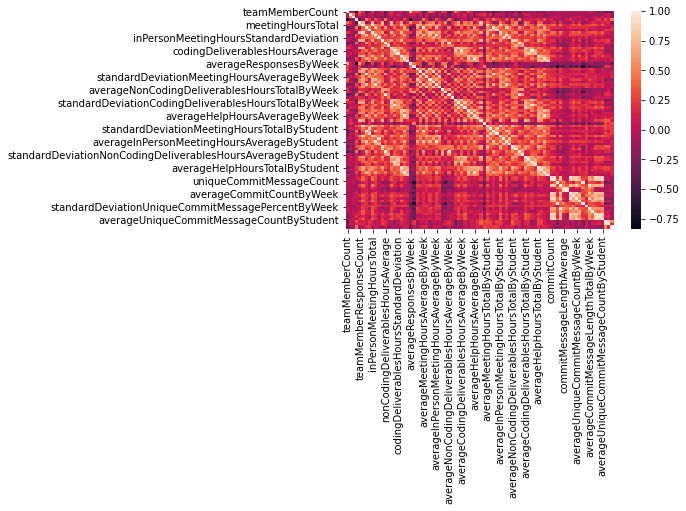

In [5]:
corr = data.corr()
figure = sns.heatmap(corr)

In [6]:
fig = figure.get_figure()
fig.savefig("before_process_t3.png", dpi=600, transparent=False, figsize=(20,12))

In [7]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [8]:
selected_columns = selected_columns[1:].values
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = ap.OLS(Y,x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [9]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

In [10]:
result = pd.DataFrame()
result['diagnosis'] = df.iloc[:, 84].values

In [11]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

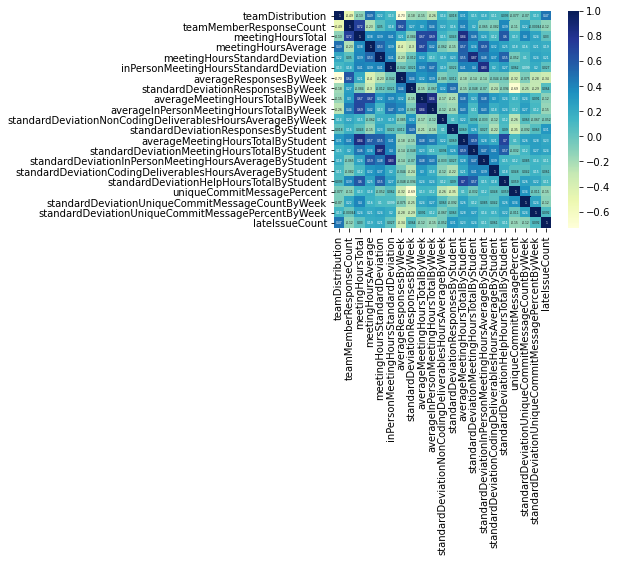

In [12]:
corr_1 = data.corr()
sns_plot = sns.heatmap(corr_1, annot=True, annot_kws={'size': 3}, square=True, 
                       cmap='YlGnBu', xticklabels=True, yticklabels=True)

In [13]:
fig = sns_plot.get_figure()
fig.savefig("T3_Process_Corelation.png", dpi=600, transparent=False, figsize=(20,12))

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.25)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
svc=SVC() 
svc.fit(x_train, y_train)

SVC()

In [15]:
prediction = svc.predict(x_test)

In [16]:
print("Accuracy:",accuracy_score(y_test, prediction))
print("F1 Score: ",f1_score(y_test, prediction, average='macro'))
print("Recall score: ", recall_score(y_test,prediction, average='macro'))

Accuracy: 0.6842105263157895
F1 Score:  0.525
Recall score:  0.5714285714285714
